# * Loan Application Status Prediction

# Problem Statement:

# This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

# Independent Variables:

# - Loan_ID 

# - Gender

# - Married

# - Dependents

# - Education

# - Self_Employed

# - ApplicantIncome

# - CoapplicantIncome

# - Loan_Amount

# - Loan_Amount_Term

# - Credit History

# - Property_Area

# Dependent Variable (Target Variable):

# - Loan_Status

# You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"D:\New folder\loan_prediction.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#Lets check the shape of dataset
data.shape

(614, 13)

 So , here we have 614 rows and 13 columns

# Data is Duplicated ?

In [4]:
data.duplicated().sum()

0

so,  here we have 0 Duplicated Data

In [5]:
#Lets check the data type of dataset
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

so here we have

Float Type - CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History column

int64 type - ApplicantIncome only one columns

object type - Then all columns

In [6]:
#Checking the information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#Checking null values in dataset
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Value counts function

In [8]:
data['Loan_ID'].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [9]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [13]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
data['ApplicantIncome'].value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [15]:
data['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [16]:
data['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [17]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [18]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [19]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [20]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

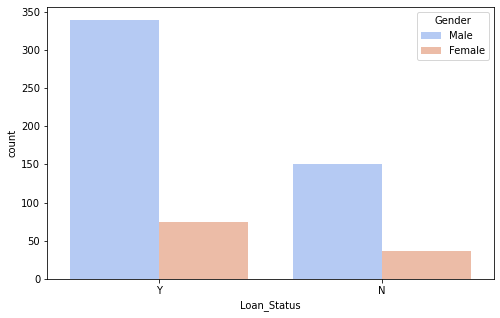

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(data['Loan_Status'],palette='coolwarm',hue='Gender',data=data);

# Filling NULL Value

In [22]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [23]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Loan_Status
# Replace label columns

In [24]:
 from sklearn.preprocessing import LabelEncoder

In [25]:
lab_enc=LabelEncoder()

In [26]:
df2 = lab_enc.fit_transform(data['Loan_Status'])
pd.Series(df2)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Length: 614, dtype: int32

In [27]:
data['Loan_Status']=df2
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


In [28]:
data['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [29]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049,0.687296
std,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [30]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,0.011134,-0.059187
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.036416
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.020974
Credit_History,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.540556
Loan_Status,-0.004710,-0.059187,-0.036416,-0.020974,0.540556,1.000000


<AxesSubplot:>

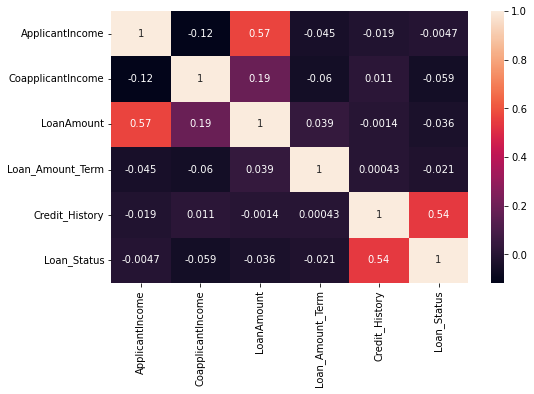

In [31]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True)

# EDA

# Histogram

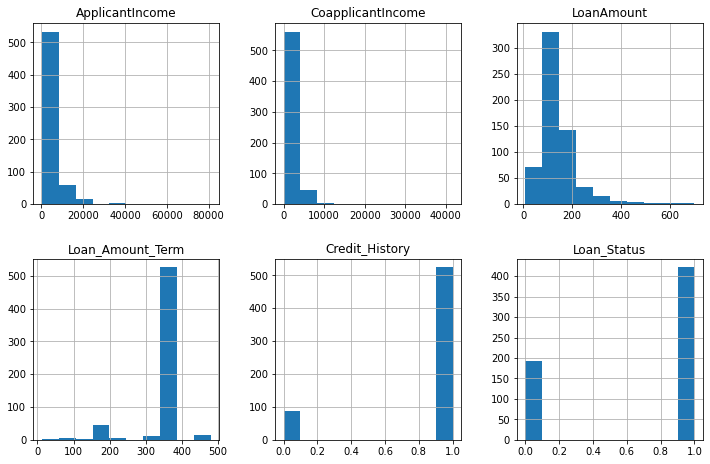

In [32]:
data.hist(figsize=(12,12),layout=(3,3),sharex=False);

# BOXPLOT

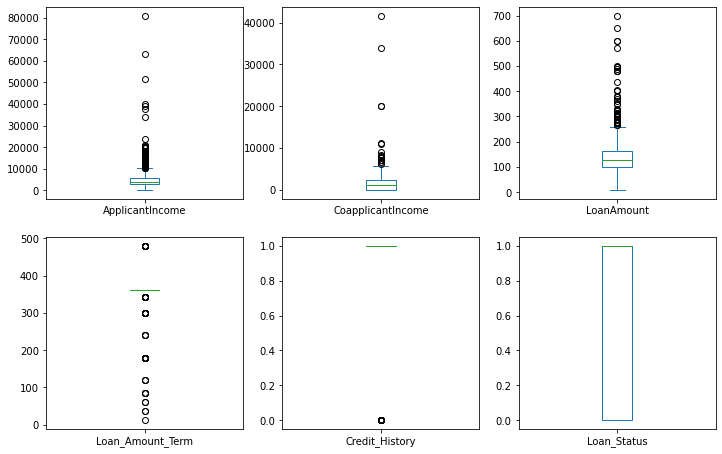

In [33]:
data.plot(kind='box',figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

<AxesSubplot:xlabel='Gender', ylabel='count'>

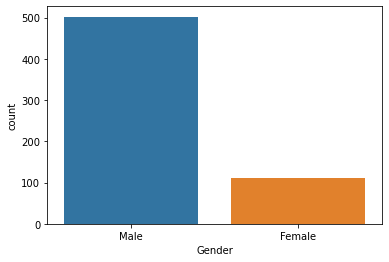

In [34]:
sns.countplot(data['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

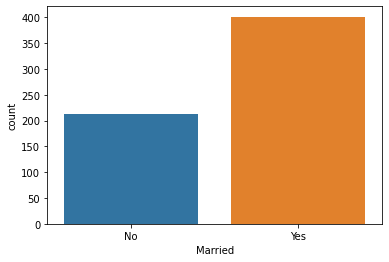

In [35]:
sns.countplot(data['Married'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

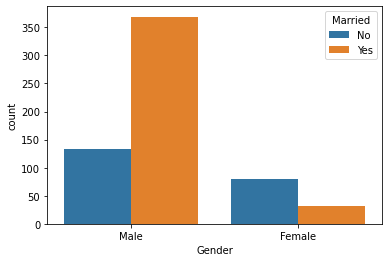

In [36]:
sns.countplot(data['Gender'], hue=data['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

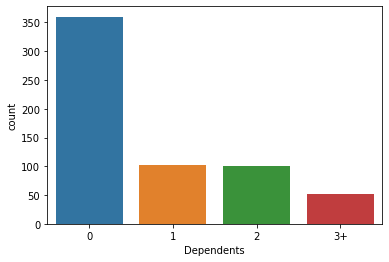

In [37]:
sns.countplot(data['Dependents'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

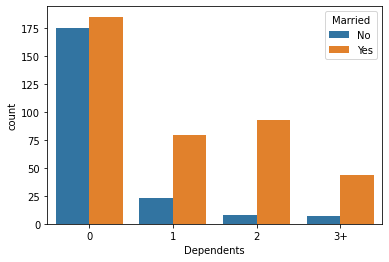

In [38]:
sns.countplot(data['Dependents'],hue=data['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

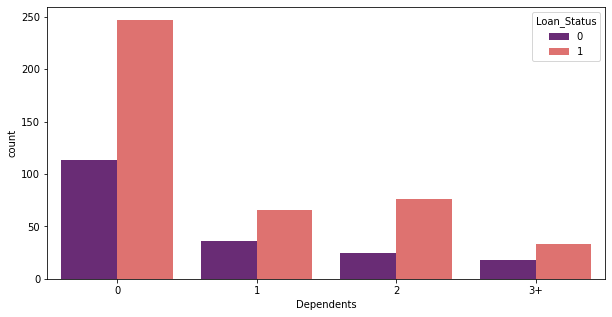

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(data['Dependents'], hue='Loan_Status', data=data, palette='magma')

<AxesSubplot:xlabel='Education', ylabel='count'>

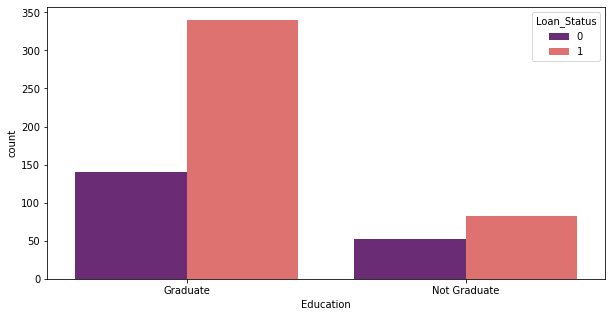

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(data['Education'], hue='Loan_Status', data=data, palette='magma')

<AxesSubplot:xlabel='Education', ylabel='count'>

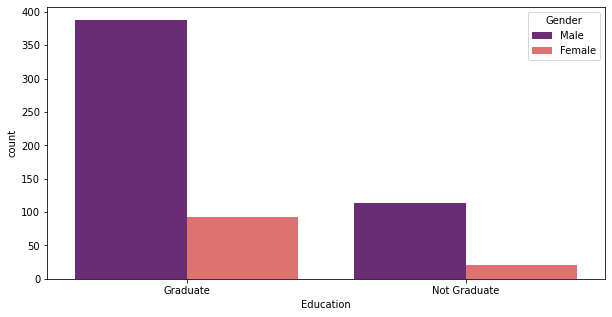

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(data['Education'], hue='Gender', data=data, palette='magma')

<AxesSubplot:xlabel='Married', ylabel='count'>

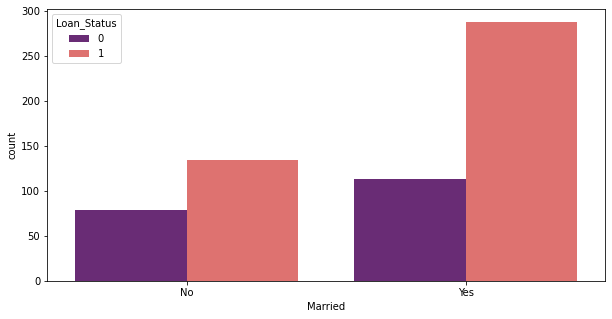

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(data['Married'], hue='Loan_Status', data=data, palette='magma')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

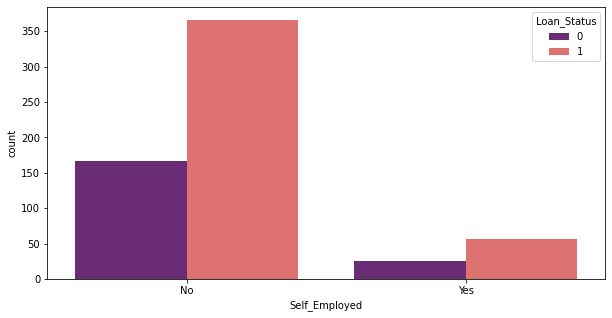

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(data['Self_Employed'], hue='Loan_Status', data=data, palette='magma')

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

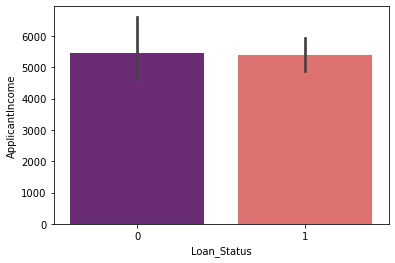

In [44]:
sns.barplot(x='Loan_Status',y='ApplicantIncome', data=data,palette='magma')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

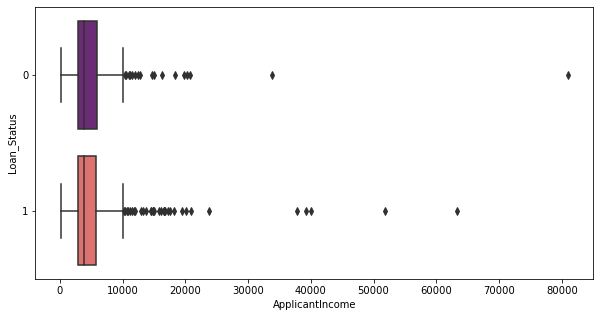

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data['ApplicantIncome'],y=data['Loan_Status'],orient='h',palette='magma')

# LoanAmount vs Loan

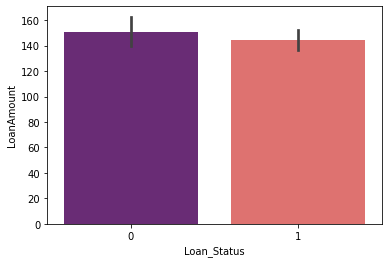

In [46]:
sns.barplot(y=data['LoanAmount'],x=data['Loan_Status'],palette='magma');

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

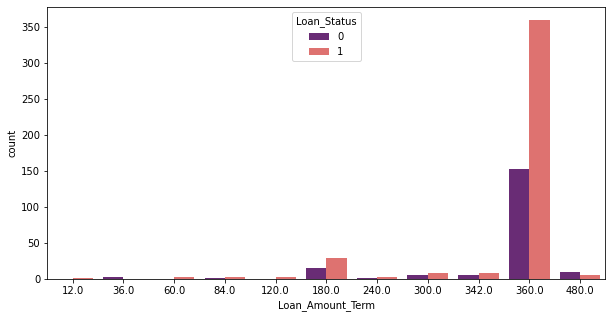

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(data['Loan_Amount_Term'],hue='Loan_Status',data=data,palette='magma')

# Property_Area vs Loan

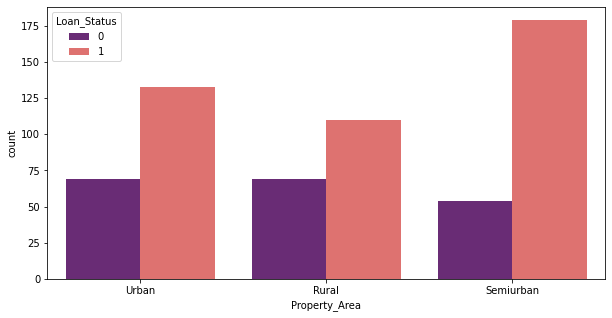

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(data['Property_Area'],hue=data['Loan_Status'],palette='magma');

# Credit_History vs Loan

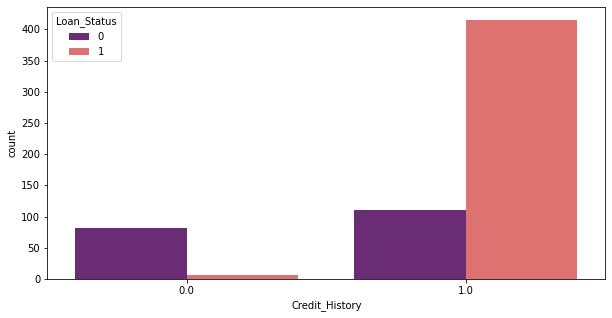

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(data['Credit_History'],hue=data['Loan_Status'],palette='magma');

# CHECKING FOR OUTLIERS

In [50]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049,0.687296
std,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


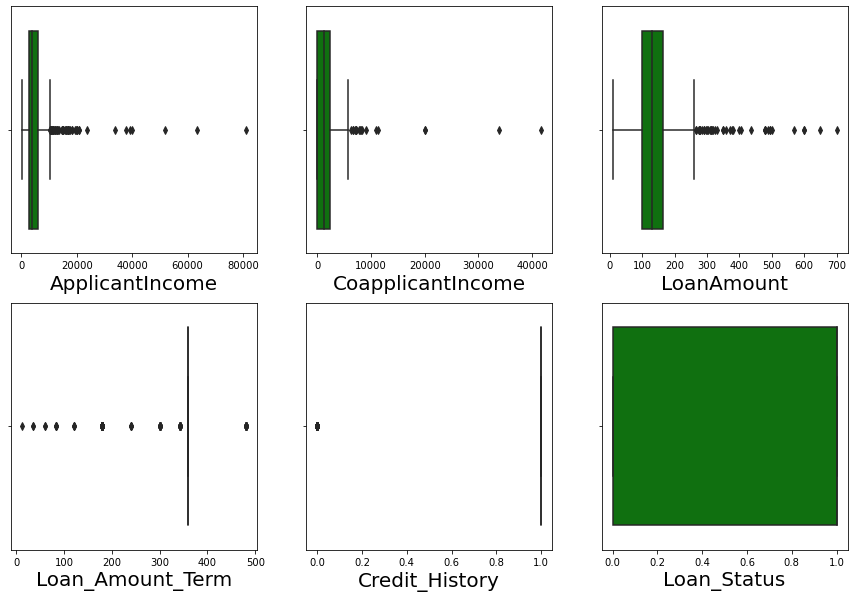

In [51]:
numerical_col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']
plt.figure(figsize=(15,10), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.boxplot(data[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Removing Outliers:
# Zscore method:

In [52]:
from scipy.stats import zscore
z_score=zscore(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])
abs_z_score=np.abs(z_score)

In [53]:
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,4666.020797,1420.807487,136.048644,347.604853,0.850953,0.689775
std,2965.452652,1651.545352,56.193532,51.819095,0.356444,0.462987
min,150.000000,0.000000,9.000000,180.000000,0.000000,0.000000
25%,2833.000000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3750.000000,1255.000000,128.000000,360.000000,1.000000,1.000000
75%,5532.000000,2253.000000,160.000000,360.000000,1.000000,1.000000
max,20667.000000,8980.000000,380.000000,480.000000,1.000000,1.000000


# Checking and removing Skewness:

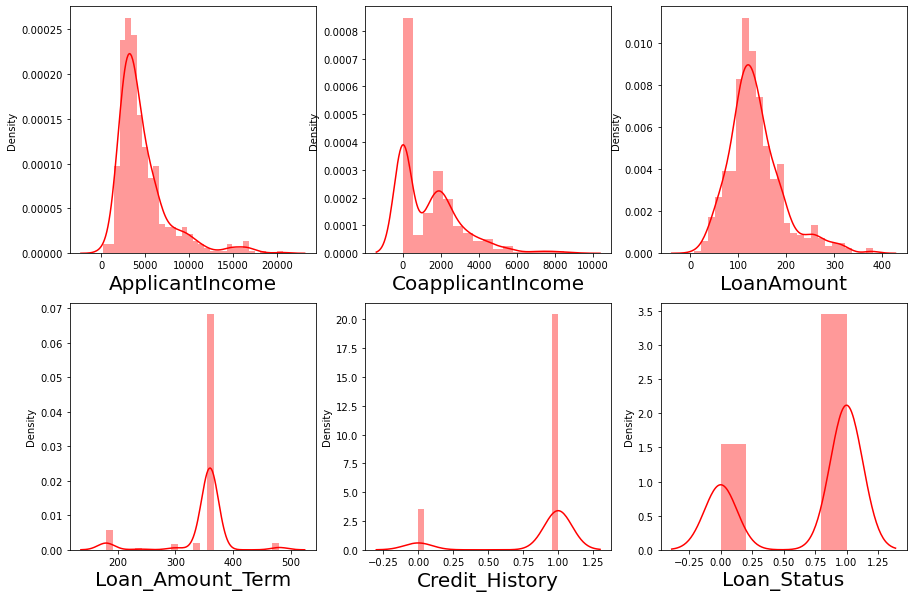

In [54]:
numerical_col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']
plt.figure(figsize=(15,10), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(data[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [55]:
data.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Loan_Status         -0.822635
dtype: float64

In [56]:
from sklearn.preprocessing import power_transform

data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]=power_transform(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])
   

In [57]:
data.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.976043
Loan_Status         -0.822635
dtype: float64

# Encoding:

In [58]:
df1 = data.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,364,0,98,4,1,2,1
1,1,1,1,1,0,0,296,57,79,4,1,0,0
2,2,1,1,0,0,1,134,0,24,4,1,2,1
3,3,1,1,0,1,0,86,157,71,4,1,2,1
4,4,1,0,0,0,0,369,0,92,4,1,2,1


In [59]:
data.shape

(577, 13)

# Correlation using HEAT map:

In [60]:
# Checking the correlation between features and the target
cor = df1.corr()
cor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.011887,-0.013677,0.059780,0.053923,0.037935,0.011655,-0.050611,0.010281,-0.013134,-0.043065,-0.164261,0.023708
Gender,-0.011887,1.000000,0.378997,0.188162,0.045696,-0.006207,0.062560,0.186113,0.172230,-0.101667,0.013172,-0.026340,0.017408
Married,-0.013677,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.020262,0.228018,0.183094,-0.118924,0.019308,0.010595,0.089026
Dependents,0.059780,0.188162,0.329900,1.000000,0.069814,0.044543,0.131669,-0.067397,0.127149,-0.079437,-0.020288,0.002327,0.017872
Education,0.053923,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.184374,-0.041267,-0.141845,-0.111258,-0.075217,-0.068596,-0.092658
Self_Employed,0.037935,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.198667,-0.041721,0.116852,-0.026990,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.011655,0.062560,-0.020262,0.131669,-0.184374,0.198667,1.000000,-0.249266,0.485273,-0.037608,0.043014,-0.049362,-0.013230
CoapplicantIncome,-0.050611,0.186113,0.228018,-0.067397,-0.041267,-0.041721,-0.249266,1.000000,0.300720,-0.048503,-0.008717,-0.101921,0.036494
LoanAmount,0.010281,0.172230,0.183094,0.127149,-0.141845,0.116852,0.485273,0.300720,1.000000,0.060227,0.005775,-0.088029,-0.032171
Loan_Amount_Term,-0.013134,-0.101667,-0.118924,-0.079437,-0.111258,-0.026990,-0.037608,-0.048503,0.060227,1.000000,0.062757,-0.071360,0.013465


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'Loan_ID'),
  Text(0, 1.5, 'Gender'),
  Text(0, 2.5, 'Married'),
  Text(0, 3.5, 'Dependents'),
  Text(0, 4.5, 'Education'),
  Text(0, 5.5, 'Self_Employed'),
  Text(0, 6.5, 'ApplicantIncome'),
  Text(0, 7.5, 'CoapplicantIncome'),
  Text(0, 8.5, 'LoanAmount'),
  Text(0, 9.5, 'Loan_Amount_Term'),
  Text(0, 10.5, 'Credit_History'),
  Text(0, 11.5, 'Property_Area'),
  Text(0, 12.5, 'Loan_Status')])

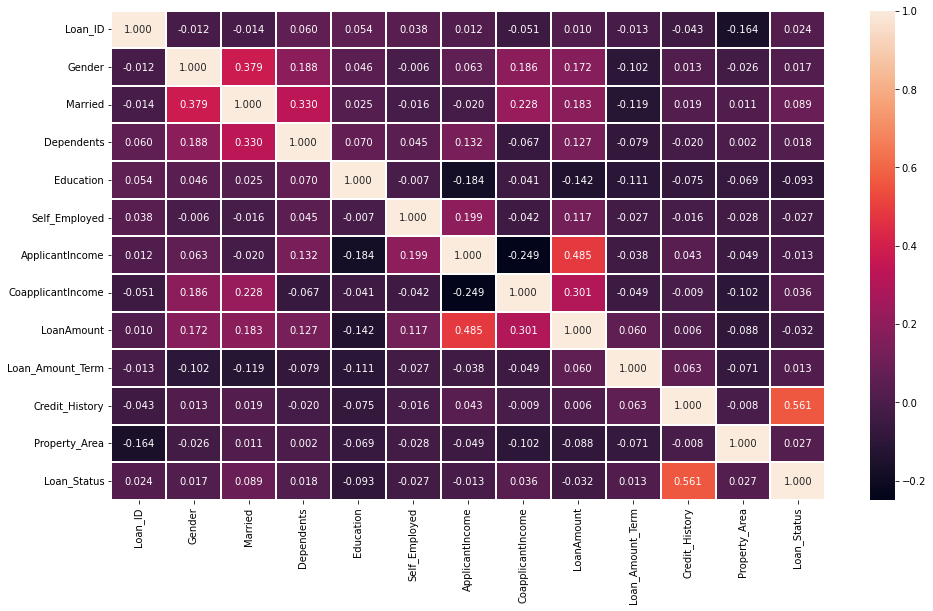

In [61]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df1.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)

In [62]:
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.560936
Married              0.089026
CoapplicantIncome    0.036494
Property_Area        0.026507
Loan_ID              0.023708
Dependents           0.017872
Gender               0.017408
Loan_Amount_Term     0.013465
ApplicantIncome     -0.013230
Self_Employed       -0.026525
LoanAmount          -0.032171
Education           -0.092658
Name: Loan_Status, dtype: float64

# Visualizing the correlation between label and features using bar plot

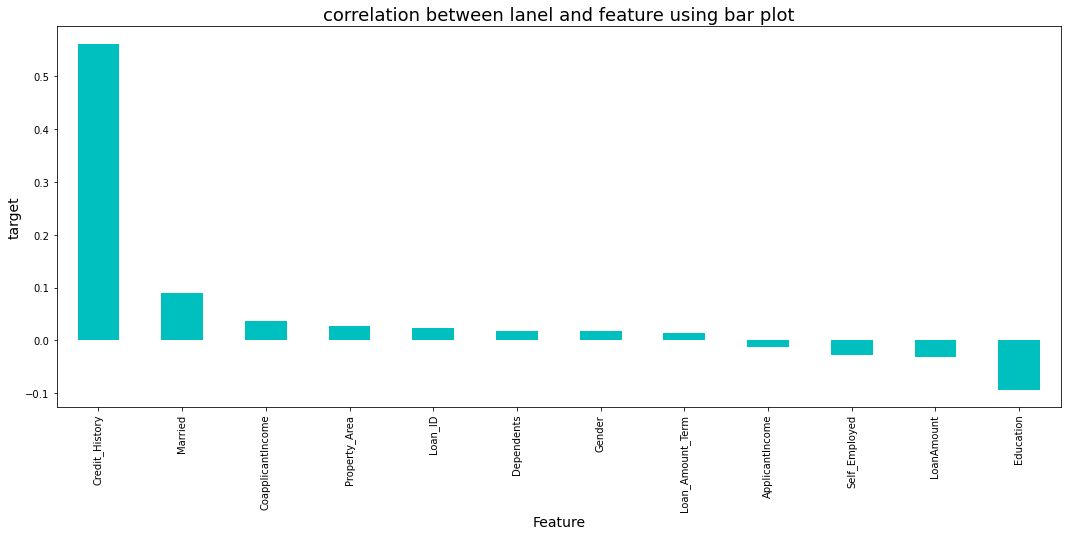

In [63]:
plt.figure(figsize=(18,7))
df1.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

# Dividing data in feature and Label

In [64]:
x=df1.drop(columns='Loan_Status')#Feature
y=df1.Loan_Status#Target

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
smt=SMOTE()
x_sample,y_sample=smt.fit_resample(x,y)

In [67]:
#Lets import standardscaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.72905158,  0.47713685, -1.36251079, ...,  0.31499539,
         0.41851254,  1.22747207],
       [-1.72304793,  0.47713685,  0.73393914, ...,  0.31499539,
         0.41851254, -1.30652215],
       [-1.71704428,  0.47713685,  0.73393914, ...,  0.31499539,
         0.41851254,  1.22747207],
       ...,
       [ 1.71704428,  0.47713685,  0.73393914, ...,  0.31499539,
         0.41851254,  1.22747207],
       [ 1.72304793,  0.47713685,  0.73393914, ...,  0.31499539,
         0.41851254,  1.22747207],
       [ 1.72905158, -2.09583477, -1.36251079, ...,  0.31499539,
        -2.38941464, -0.03952504]])

# Now use VIF for checking multicollinearity problem

VIF - > Variance Inflation Factor

In [68]:
#Lets import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature']=x.columns

In [69]:
vif

,vif,feature
0,1.042162,Loan_ID
1,1.213257,Gender
2,1.355621,Married
3,1.191139,Dependents
4,1.089198,Education
5,1.046238,Self_Employed
6,1.832453,ApplicantIncome
7,1.548921,CoapplicantIncome
8,1.827110,LoanAmount
9,1.075336,Loan_Amount_Term


# Lets check with AdaBoostClassifier

In [79]:
from sklearn.ensemble import AdaBoostClassifier

In [80]:
ada = AdaBoostClassifier()

In [81]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    ada.fit(x_train,y_train)
    x_pred=ada.predict(x_train)
    y_pred=ada.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.8633405639913232
 At random state 0 , the testing accuracy is :- 0.7758620689655172


 At random state 1 , the testing accuracy is :- 0.8481561822125814
 At random state 1 , the testing accuracy is :- 0.7844827586206896


 At random state 2 , the testing accuracy is :- 0.8698481561822126
 At random state 2 , the testing accuracy is :- 0.7672413793103449


 At random state 3 , the testing accuracy is :- 0.8546637744034707
 At random state 3 , the testing accuracy is :- 0.7413793103448276


 At random state 4 , the testing accuracy is :- 0.8481561822125814
 At random state 4 , the testing accuracy is :- 0.7844827586206896


 At random state 5 , the testing accuracy is :- 0.8503253796095445
 At random state 5 , the testing accuracy is :- 0.7586206896551724


 At random state 6 , the testing accuracy is :- 0.8524945770065075
 At random state 6 , the testing accuracy is :- 0.8103448275862069


 At random state 7 , the testing accuracy is :- 

For AdaBoostClassifier we select Random State - 38

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=38)

In [83]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [84]:
ada.score(x_train,y_train)#Training Score

0.8373101952277657

In [85]:
ada.score(x_test,y_test)#Testing Score

0.853448275862069

# Lets check with KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [87]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    x_pred=knn.predict(x_train)
    y_pred=knn.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.7527114967462039
 At random state 0 , the testing accuracy is :- 0.6120689655172413


 At random state 1 , the testing accuracy is :- 0.7440347071583514
 At random state 1 , the testing accuracy is :- 0.6551724137931034


 At random state 2 , the testing accuracy is :- 0.735357917570499
 At random state 2 , the testing accuracy is :- 0.6206896551724138


 At random state 3 , the testing accuracy is :- 0.7331887201735358
 At random state 3 , the testing accuracy is :- 0.6551724137931034


 At random state 4 , the testing accuracy is :- 0.7483731019522777
 At random state 4 , the testing accuracy is :- 0.5948275862068966


 At random state 5 , the testing accuracy is :- 0.7570498915401301
 At random state 5 , the testing accuracy is :- 0.6293103448275862


 At random state 6 , the testing accuracy is :- 0.735357917570499
 At random state 6 , the testing accuracy is :- 0.6551724137931034


 At random state 7 , the testing accuracy is :- 0.

For KNN we select Random State - 25

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=25)

In [89]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [90]:
knn.score(x_train,y_train)#Training Score

0.7223427331887202

In [91]:
knn.score(x_test,y_test)#Testing Score

0.7155172413793104

# Lets check with Decision Tree Classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [93]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    x_pred=dt.predict(x_train)
    y_pred=dt.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 1.0
 At random state 0 , the testing accuracy is :- 0.6982758620689655


 At random state 1 , the testing accuracy is :- 1.0
 At random state 1 , the testing accuracy is :- 0.6896551724137931


 At random state 2 , the testing accuracy is :- 1.0
 At random state 2 , the testing accuracy is :- 0.6896551724137931


 At random state 3 , the testing accuracy is :- 1.0
 At random state 3 , the testing accuracy is :- 0.6896551724137931


 At random state 4 , the testing accuracy is :- 1.0
 At random state 4 , the testing accuracy is :- 0.7327586206896551


 At random state 5 , the testing accuracy is :- 1.0
 At random state 5 , the testing accuracy is :- 0.646551724137931


 At random state 6 , the testing accuracy is :- 1.0
 At random state 6 , the testing accuracy is :- 0.8362068965517241


 At random state 7 , the testing accuracy is :- 1.0
 At random state 7 , the testing accuracy is :- 0.6896551724137931


 At random state 8 , the testing 

For Decision Tree  we select Random State - 6

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6)

In [95]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [96]:
dt.score(x_train,y_train)#Training Score

1.0

In [97]:
dt.score(x_test,y_test)#Testing Score

0.7844827586206896

# Lets check with Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [99]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    x_pred=rf.predict(x_train)
    y_pred=rf.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 1.0
 At random state 0 , the testing accuracy is :- 0.7931034482758621


 At random state 1 , the testing accuracy is :- 1.0
 At random state 1 , the testing accuracy is :- 0.8189655172413793


 At random state 2 , the testing accuracy is :- 1.0
 At random state 2 , the testing accuracy is :- 0.7931034482758621


 At random state 3 , the testing accuracy is :- 1.0
 At random state 3 , the testing accuracy is :- 0.8103448275862069


 At random state 4 , the testing accuracy is :- 1.0
 At random state 4 , the testing accuracy is :- 0.7844827586206896


 At random state 5 , the testing accuracy is :- 1.0
 At random state 5 , the testing accuracy is :- 0.7672413793103449


 At random state 6 , the testing accuracy is :- 1.0
 At random state 6 , the testing accuracy is :- 0.8620689655172413


 At random state 7 , the testing accuracy is :- 1.0
 At random state 7 , the testing accuracy is :- 0.8017241379310345


 At random state 8 , the testing

For Random Forest we select Random State - 39

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=39)

In [101]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [102]:
rf.score(x_train,y_train)#Training Score

1.0

In [103]:
rf.score(x_test,y_test)#Testing Score

0.8620689655172413

# Do Hyperparameter Tuning

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
grid_param={
    'criterion':['ginni','entropy'],
    'max_depth': range(10,15),# The Maximum depth of the tree
    'min_samples_leaf':range(2,6),#The maximum number of samples required to be at a leaf node
    'min_samples_split':range(3,6),#The minimum numbers of sample required to split an internal node
    'max_leaf_nodes':range(2,5)}#Best nodes are defined as them unlimited number of leaf nodes

In [106]:
grid_search=GridSearchCV(estimator=rf,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)

In [107]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 5),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 6)})

In [146]:
cnn=RandomForestClassifier(criterion='entropy',max_depth=15,max_leaf_nodes=4,min_samples_split= 4)

In [147]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [148]:
#Train the model
cnn.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=4,
                       min_samples_split=4)

In [149]:
cnn.score(x_train,y_train)

0.8004338394793926

In [150]:
cnn.score(x_test,y_test)

0.8879310344827587

# Lets Save Our Model

In [151]:
import pickle
filename='loanapplication.'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [152]:
loaded_model=pickle.load(open('loanapplication','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

86.20689655172413


In [153]:
# batch  No - ds0522
# Data Trained